# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('03-x_train-IEMOCAP-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('03-x_test-IEMOCAP-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('03-y_train-IEMOCAP-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('03-y_test-IEMOCAP-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)


# **SELECCION DE CARACTERISTICAS**

In [3]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **BALANCEO DE DATOS**

In [4]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [5]:
overs = RandomOverSampler()

In [6]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [7]:
y_t_overs

,Emociones
0,2
1,2
2,2
3,3
4,0
...,...
3439,3
3440,3
3441,3
3442,3


# **NORMALIZACION DE CARACTERISTICAS**

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_t_overs)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [9]:
x_train_std

array([[-0.00746065,  0.53074959, -1.24442755, ...,  0.54917188,
         0.07230722,  0.2918033 ],
       [-0.39547339, -0.89028609,  1.04106182, ..., -0.65066227,
        -0.88799617,  0.38951362],
       [-0.33715024, -0.01929105, -0.11482241, ...,  0.65302832,
        -2.1303767 ,  0.22949882],
       ...,
       [-0.83253185, -1.64465459,  1.35766959, ..., -0.73578977,
         1.03880999, -0.10814945],
       [-0.51026841, -1.40365346,  1.95477815, ..., -0.87791898,
        -0.07932122,  0.27003339],
       [ 0.20141269, -0.23302817, -0.26607329, ..., -0.71467095,
        -0.25204415,  0.56127129]])

In [10]:
y_t_overs

,Emociones
0,2
1,2
2,2
3,3
4,0
...,...
3439,3
3440,3
3441,3
3442,3


# **MODELO DE MARCHINE LEARNING**

In [11]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               11776     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 81,700
Trainable params: 81,700
Non-trainable params: 0
_________________________________________________________________


In [12]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_t_overs)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I

Epoch 1/800
108/108 [==============================] - 1s 4ms/step - loss: 0.9684 - accuracy: 0.5671
Epoch 2/800
108/108 [==============================] - 0s 4ms/step - loss: 0.8191 - accuracy: 0.6492
Epoch 3/800
108/108 [==============================] - 0s 4ms/step - loss: 0.7504 - accuracy: 0.6855
Epoch 4/800
108/108 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.7233
Epoch 5/800
108/108 [==============================] - 0s 4ms/step - loss: 0.6048 - accuracy: 0.7619
Epoch 6/800
108/108 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.7880
Epoch 7/800
108/108 [==============================] - 0s 3ms/step - loss: 0.4786 - accuracy: 0.8188
Epoch 8/800
108/108 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.8403
Epoch 9/800
108/108 [==============================] - 0s 3ms/step - loss: 0.3796 - accuracy: 0.8612
Epoch 10/800
108/108 [==============================] - 0s 3ms/step - loss: 0.3389 - accura

array([0, 2, 2, 2, 2, 2, 3, 2, 2, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 1, 2, 2,
       0, 3, 2, 0, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 1, 0, 3, 1,
       3, 3, 2, 3, 3, 1, 2, 2, 2, 2, 1, 2, 3, 2, 0, 2, 2, 2, 3, 2, 0, 3,
       1, 3, 2, 3, 2, 3, 3, 3, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 0, 1, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 3,
       2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 3, 1, 2,
       2, 3, 2, 1, 3, 2, 0, 2, 3, 2, 3, 2, 3, 3, 0, 2, 2, 1, 2, 3, 0, 0,
       0, 3, 3, 1, 0, 3, 2, 2, 0, 2, 2, 3, 0, 2, 3, 2, 2, 3, 2, 1, 3, 1,
       2, 3, 0, 3, 1, 2, 0, 0, 3, 2, 2, 0, 3, 3, 3, 1, 2, 3, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 1, 1,
       0, 1, 3, 2, 3, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 3, 2, 2, 0, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 3,
       2, 1, 1, 3, 2, 3, 0, 2, 3, 3, 0, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 2, 0, 3, 2, 3, 2, 3, 2,

# **EVALUACION**

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.58      0.72      0.64        53
           1       0.28      0.21      0.24        56
           2       0.70      0.67      0.69       238
           3       0.64      0.70      0.67       109

    accuracy                           0.63       456
   macro avg       0.55      0.58      0.56       456
weighted avg       0.62      0.63      0.62       456



In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.58      0.72      0.64        53
           1       0.28      0.21      0.24        56
           2       0.70      0.67      0.69       238
           3       0.64      0.70      0.67       109

    accuracy                           0.63       456
   macro avg       0.55      0.58      0.56       456
weighted avg       0.62      0.63      0.62       456

Matriz de confusión, sin normalización
[[ 38   4  11   0]
 [ 10  12  26   8]
 [ 17  26 160  35]
 [  1   1  31  76]]


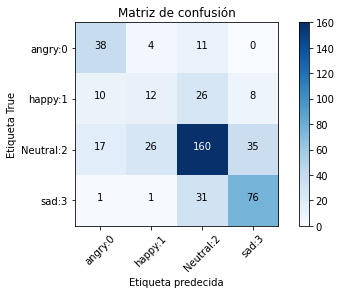

In [15]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')